<a href="https://colab.research.google.com/github/SamDavis630/INFO5502-Summer2022/blob/main/lab_assignment_08_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The Eighth Lab-assignment (08/09/2022 11:59'AM' - 08/12/2022 11:59PM, 50 points in total)

The purpose of this assignment is to practice different Hypothesis Testing and annotation quality evaluation.

### Question 1 (10 points) 

During the 1980s, the general consensus is that about 5% of the nation’s children had autism. Some claimed that increases certain chemicals in the environment has led to an increase in autism. 

(1) Write an appropriate hypothesis test for this situation (5 points).  

(2) Give an appropriate test for this hypothesis, stating what are the necessary conditions for performing the test (5 points). 

(3) A recent study examined 384 children and found that 46 showed signs of autism. Perform a test of the hypothesis and state the p-value (5 points). 

In [ ]:
# You answer here
#1) p= proprtion of children with congenital abnormalities. H0(Null Hypothesis): p = 0.05; HA(Alt Hypothesis): p > 0.05
#2)Right-tailed test; normal and continuous 

In [ ]:
# your code here

import numpy as np
import scipy.stats as stats
import pandas as pd
from math import sqrt

P_1 = 46/384

#calculating test statistic test

Z_STAT = (P_1-0.05)/sqrt(0.05*(1-0.05)/384)

print("test statistic is ", Z_STAT)

#H0 is rejected

#find the p-value
print("P-value is", 1-stats.norm.cdf(Z_STAT))

test statistic is  6.27512493759735
P-value is 1.7467682855709654e-10


### Question 2 (10 points) 
In this problem,we will examine the sugar content of several national brands of cereals, here measured as a percentage of weight.


(1) Give a summary of these two datasets (5 points). 

(2) Create side-by-side boxplots and interpret what you see (5 points). 

(3) Use python to create a 95% confidence interval for the difference in mean sugar content and explain your result (5 points). 

In [ ]:
# You answer here

#1) Describe date - Statistic Summary
import pandas as pd
import numpy as np

c_data = pd.Series([40.3, 55.0, 45.7, 43.3, 50.3, 45.9, 53.5, 43, 44.2, 44, 33.6, 55.1, 48.8, 50.4, 37.8, 60.3, 46.6, 47.4, 44])
c_data.describe()

count    19.000000
mean     46.800000
std       6.418376
min      33.600000
25%      43.650000
50%      45.900000
75%      50.350000
max      60.300000
dtype: float64

In [ ]:
a_data = pd.Series([20, 30.2, 2.2, 7.5, 4.4, 22.2, 16.6, 14.5, 21.4, 3.3, 10, 1, 4.4, 1.3, 8.1, 6.6, 7.8, 10.6, 16.2, 14.5, 4.1, 15.8, 4.1, 2.4, 3.5, 8.5, 4.7, 18.4])

a_data.describe()

count    28.000000
mean     10.153571
std       7.612392
min       1.000000
25%       4.100000
50%       7.950000
75%      15.900000
max      30.200000
dtype: float64

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


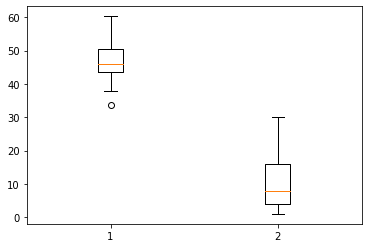

In [ ]:
# your code here

#Import Libraries
import matplotlib.pyplot as plt

#Creating Plot
data = [c_data, a_data]

plt.boxplot(data)

plt.show()

#Intrepretation: For childern and adult sugar levels in cereal, most of the data is larger than the mean of each cereal type.


In [ ]:
#calculate standard error of mean for childeren

sem_c = 6.4/sqrt(19)

print("SEM for children is", sem_c)

sem_a = 7.6/sqrt(28)

print("SEM for children is", sem_a)

#calculate 95% confidence interval
#children
confid_c_1 = 46.8 + 2*(1.47)
confid_c_2 = 46.8 - 2*(1.47)
print("95% confidnece interval", confid_c_2, "to", confid_c_1 )
#adult
confid_interval_a_1 = 10.2 + 2*(1.44)
confid_interval_a_2 = 10.2 - 2*(1.44)
print("95% confidnece interval", confid_interval_a_2, "to", confid_interval_a_1 )

#calculate standard error of difference
sed = sqrt((1.47**2)+(1.44**2))
print("standard error of difference is", sed)

diff_confid = (46.8-10.2) - (2*sed)
diff_confid_2 = (46.8-10.2) + (2*sed)

print("95% confidence interval for the difference between these two means are", diff_confid, diff_confid_2)

SEM for children is 1.4682606967715952
SEM for children is 1.4362649974350634
95% confidnece interval 43.86 to 49.739999999999995
95% confidnece interval 7.319999999999999 to 13.079999999999998
standard error of difference is 2.057790076757102
95% confidence interval for the difference between these two means are 32.48441984648579 40.715580153514196


### Question 3 (30 points) 

Cohen's kappa coefficient (κ) is a statistic that is used to measure inter-rater reliability (and also intra-rater reliability) for qualitative (categorical) items. It is generally thought to be a more robust measure than simple percent agreement calculation, as κ takes into account the possibility of the agreement occurring by chance. There is controversy surrounding Cohen's kappa due to the difficulty in interpreting indices of agreement. Some researchers have suggested that it is conceptually simpler to evaluate disagreement between items.

A more detailed description of Kappa agreement can be found on wikipedia: https://en.wikipedia.org/wiki/Cohen%27s_kappa

Here is the dataset we created for a text classification task: https://github.com/suthapalliuday/INFO5502-Summer2022/blob/main/datasets/lab08-dataset.csv

The last three columns indicate the annotation on the same sentence by three students respectively. Based on this dataset, please calculate the Cohen's kappa and the Fleiss' kappa using their formulars (Python). Please don't use any existing packages for the implementation. 

In [ ]:
# your code here
from sklearn.metrics import cohen_kappa_score

#import file
data= pd.read_csv('lab08-dataset.csv')

#calculate cohen kappa

stud_1_2 = cohen_kappa_score(data.Annotation1, data.Annotation2)

stud_2_3 = cohen_kappa_score(data.Annotation2, data.Annotation3)

stud_1_3 = cohen_kappa_score(data.Annotation1, data.Annotation3)

print("cohen kapp for student one and two is ", stud_1_2, "cohen kapp for student two and three is ", stud_2_3, "cohen kapp for student one and three is ", stud_1_3)




cohen kapp for student one and two is  0.42830184648552283 cohen kapp for student two and three is  0.5201725501326195 cohen kapp for student one and three is  0.6699506558982792


In [ ]:
#calculate fleiss' kappa
from statsmodels.stats.inter_rater import fleiss_kappa
#import file
data2= pd.read_csv('lab08-dataset.csv')

fleiss_kappa(data2, method='fleiss')


TypeError: ignored